# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Flatten, Conv1D, BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/ kutub/7004OTT Content Reviews.csv', encoding='UTF-8')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


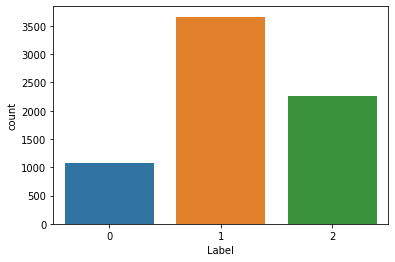

In [5]:
sns.countplot(data['Label'])

3 polarities in the Dataset

# Data Preprocessing

1. Text to Word
2. Removing Punctuations and Special Characters

In [6]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [8]:
data['Text'] = data.Text.apply(lambda x: preprocessing(str(x)))

In [9]:
data.reset_index(drop=True, inplace=True)


In [10]:
#enc = LabelEncoder()
#dataset_cricket['Polarity'] = enc.fit_transform(dataset_cricket['Polarity'])


Now we will prepare the dataset to train in the proposed CNN network.So, we have to convert all Sentences into a numpy Array.

We have divided the training and testing data into 80/20 ratio.

We have converted the sentiment values into one hot encodings for the convenient use in model training.

In [18]:
train1, test1 = train_test_split(data,random_state=69, test_size=0.2)
training_sentences_ott = []
testing_sentences_ott = []



train_sentences_ott=train1['Text'].values
train_labels_ott=train1['Label'].values
for i in range(train_sentences_ott.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences_ott[i])
    training_sentences_ott.append(x)
    
training_sentences_ott=np.array(training_sentences_ott)





test_sentences_ott=test1['Text'].values
test_labels_ott=test1['Label'].values

for i in range(test_sentences_ott.shape[0]): 
    x=str(test_sentences_ott[i])
    testing_sentences_ott.append(x)
    
testing_sentences_ott=np.array(testing_sentences_ott)


train_labels_ott=tf.keras.utils.to_categorical(train_labels_ott)


test_labels_ott=tf.keras.utils.to_categorical(test_labels_ott)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences_ott.shape))
print("testing_sentences shape: "+str(testing_sentences_ott.shape))
print("train_labels shape: "+str(train_labels_ott.shape))
print("test_labels shape: "+str(test_labels_ott.shape))

Training Set Length: 5602
Testing Set Length: 1401
training_sentences shape: (5602,)
testing_sentences shape: (1401,)
train_labels shape: (5602, 3)
test_labels shape: (1401, 3)


In [19]:
print(training_sentences_ott[1])
print(train_labels_ott[0])

মিলিয়ন হবে এই মাসেই ফেসবুকে ঝড় তুলবে গানটি
[0. 0. 1.]


Now, we will predefine some variables.

vocab_size is the maximum vocabulary length of Tokenizer.

KERAS tokenzier allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf.

We will be tokenizing my dataset with this class here. We have did this tokenization so that it can be later used to generate Embeddings.

The main advantage of word embedding is that words that share a similar context can be represented close to each other in the vector space. Thus, vectors carry a sense of semantic of a word.

We have predefined the embedding dimension as 300(embedding_dim).

max_length is the sentence maximum length.

trunc_type is the truncation type.

oov_token is the token for the words that are not present in the corpus.oov means out of vocabulary.

In [20]:
vocab_size = len(training_sentences_ott)+1
embedding_dim = 100
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [21]:
print(training_sentences_ott.shape)
print(train_labels_ott.shape)

(5602,)
(5602, 3)


At first, we will tokenize and then, we will be padding the sequences. We have used tokenizer only on training dataset to see how the model performs on unseen words.

In [22]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences_ott)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences_ott)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences_ott)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

10928
Word index length:10928


In [23]:
print("Sentence :--> \n")
print(training_sentences_ott[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

অধীর অপেক্ষায় ছিলাম এই গান টার জন্য  ধন্যবাদ  গান টা আরো একটু দীর্ঘ হলে আরো শান্তি পেতাম

Sentence Tokenized and Converted into Sequence :--> 

[2094, 314, 521, 4, 14, 315, 15, 44, 14, 12, 78, 116, 2778, 123, 78, 1267, 2095]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 2094
  314  521    4   14  315   15   44   14   12   78  116 2778  123   78
 1267 2095]


In [24]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5602, 100)
Padded shape(testing): (1401, 100)


# Model Creation

At first, we have created embeddings from the text.

In [25]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    pr = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1_score = 2 * (pr * rec) / (pr + rec)
    return f1_score

In [26]:
# padded
train_labels_ott

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [27]:
# raise NotImplementedError()

In [28]:
# from tensorflow.keras.layers import GlobalMaxPooling1D

detection=Sequential()

detection.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

#1 -convolutional layer-1
detection.add(Conv1D(64 ,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
detection.add(Dropout(0.1))

#2 -convolutional layer-2
detection.add(Conv1D(96,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
# detection.add(Dropout(0.2))

#2 -convolutional layer-2
detection.add(Conv1D(128,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
detection.add(Dropout(0.15))


# #2 -convolutional layer-2
# detection.add(Conv1D(256,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(GlobalMaxPooling1D())
# detection.add(Dropout(0.2))

# #3 -convolutional layer-3
# detection.add(Conv1D(384,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(GlobalMaxPooling1D())
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(UpSampling2D(input_shape=(512, 3, 3)))
# detection.add(Dropout(0.2))

# #3 -convolutional layer-3
# detection.add(Conv1D(512,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(GlobalMaxPooling1D())
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(UpSampling2D(input_shape=(512, 3, 3)))
# detection.add(Dropout(0.3))


# detection.add(Flatten())
# detection.add(Dense(512))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))

# detection.add(Flatten())
# detection.add(Dense(256))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))

detection.add(Flatten())
detection.add(Dense(128))
detection.add(BatchNormalization())
detection.add(Activation('relu'))

detection.add(Flatten())
detection.add(Dense(64))
detection.add(BatchNormalization())
detection.add(Activation('relu'))

detection.add(Dense(3,activation='sigmoid'))
optimum=Adam(lr=0.00001)
detection.summary()
detection.compile(optimizer=optimum,loss='binary_crossentropy',metrics=['accuracy', precision, recall])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          560300    
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            19264     
                                                                 
 batch_normalization (BatchN  (None, 98, 64)           256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 98, 64)            0         
                                                                 
 dropout (Dropout)           (None, 98, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 96)            18528     
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Dividing training data to training and validation.

In [29]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(padded, train_labels_ott, test_size=0.15, shuffle= True) #data, label

In [30]:
model_ott = detection.fit(x_train, y_train,shuffle=True,epochs=30,batch_size=4,validation_data=(x_valid,y_valid))#,use_multiprocessing=True, workers=8)
# model_ott=detection.fit(padded,train_labels_ott,shuffle=True,epochs=30,batch_size=16,validation_data=(testing_padded,test_labels_ott),use_multiprocessing=True, workers=8) #input, output

Epoch 1/30
1191/1191 [==============================] - 50s 40ms/step - loss: 0.8229 - accuracy: 0.2901 - precision: 0.2984 - recall: 0.4992 - val_loss: 0.8113 - val_accuracy: 0.2889 - val_precision: 0.2976 - val_recall: 0.5344
Epoch 2/30
1191/1191 [==============================] - 52s 44ms/step - loss: 0.7543 - accuracy: 0.3207 - precision: 0.3189 - recall: 0.4612 - val_loss: 0.7669 - val_accuracy: 0.3317 - val_precision: 0.3134 - val_recall: 0.4751
Epoch 3/30
1191/1191 [==============================] - 46s 39ms/step - loss: 0.6997 - accuracy: 0.3659 - precision: 0.3657 - recall: 0.4473 - val_loss: 0.7207 - val_accuracy: 0.3912 - val_precision: 0.3704 - val_recall: 0.4408
Epoch 4/30
1191/1191 [==============================] - 46s 38ms/step - loss: 0.6688 - accuracy: 0.4045 - precision: 0.3950 - recall: 0.4047 - val_loss: 0.6894 - val_accuracy: 0.4114 - val_precision: 0.4041 - val_recall: 0.4076
Epoch 5/30
1191/1191 [==============================] - 46s 39ms/step - loss: 0.6423 - a

In [31]:
detection.evaluate(x=testing_padded,y=test_labels_ott,verbose=1)
# loss: - accuracy: - recall:  - precision:

44/44 [==============================] - 1s 17ms/step - loss: 0.5299 - accuracy: 0.6167 - precision: 0.6677 - recall: 0.5052


[0.5299400091171265, 0.6167023777961731, 0.6677131056785583, 0.505227267742157]

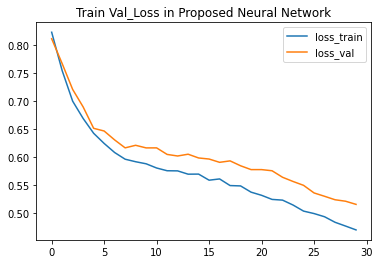

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(model_ott.history['loss'], label='loss_train')
plt.plot(model_ott.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')

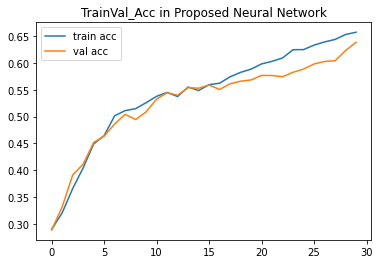

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(model_ott.history['accuracy'], label='train acc')
plt.plot(model_ott.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')